In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time
import matplotlib.pyplot as plt

In [2]:
vocab_size = 10000
max_length = 200
embedding_dim = 16
num_epochs = 10

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

In [4]:
train_data = pad_sequences(train_data, maxlen=max_length)
test_data = pad_sequences(test_data, maxlen=max_length)

In [5]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),  # Dropout layer added
    keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
start_time = time.time()
history = model.fit(train_data, train_labels, epochs=num_epochs, validation_data=(test_data, test_labels), verbose=1)
end_time = time.time()
training_time = end_time - start_time

print(f"Training Time: {training_time} seconds")

Epoch 1/10
782/782 [==============================] - 13s 13ms/step - loss: 0.5278 - accuracy: 0.7659 - val_loss: 0.3435 - val_accuracy: 0.8656
Epoch 2/10
782/782 [==============================] - 9s 12ms/step - loss: 0.3084 - accuracy: 0.8813 - val_loss: 0.2912 - val_accuracy: 0.8800
Epoch 3/10
782/782 [==============================] - 11s 14ms/step - loss: 0.2466 - accuracy: 0.9095 - val_loss: 0.2930 - val_accuracy: 0.8774
Epoch 4/10
782/782 [==============================] - 8s 11ms/step - loss: 0.2127 - accuracy: 0.9271 - val_loss: 0.2996 - val_accuracy: 0.8777
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 0.1859 - accuracy: 0.9404 - val_loss: 0.3238 - val_accuracy: 0.8701
Epoch 6/10
782/782 [==============================] - 9s 12ms/step - loss: 0.1622 - accuracy: 0.9491 - val_loss: 0.3401 - val_accuracy: 0.8698
Epoch 7/10
782/782 [==============================] - 9s 12ms/step - loss: 0.1450 - accuracy: 0.9572 - val_loss: 0.3691 - val_accuracy: 0.8

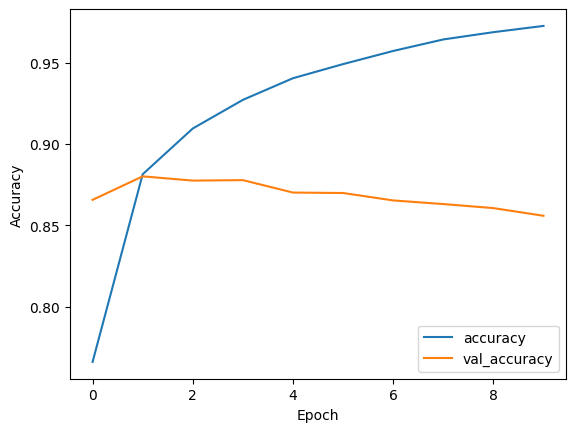

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc}')

782/782 [==============================] - 5s 6ms/step - loss: 0.4560 - accuracy: 0.8558
Test accuracy: 0.8557999730110168


In [10]:
def classify_review(review_text):
    word_index = imdb.get_word_index()
    words = review_text.lower().split()
    
    # Remove stopwords
    stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    words = [word for word in words if word not in stopwords]
    
    review = [1]
    for word in words:
        index = word_index.get(word, 0)
        if index < vocab_size:
            review.append(index + 3)
        else:
            review.append(2)
    review = pad_sequences([review], maxlen=max_length)
    start_time = time.time()
    prediction = model.predict(review)
    end_time = time.time()
    pred_time = end_time - start_time
    return "Positive" if prediction[0][0] >= 0.5 else "Negative", pred_time

In [11]:
def get_user_review():
    review = input("Please enter your movie review: ")
    return review

In [ ]:
while True:
    review = get_user_review()
    classification, pred_time = classify_review(review)
    print(f"\nClassification: {classification}")
    print(f"Prediction Time: {pred_time} seconds")
    continue_input = input("Do you want to classify another review? (yes/no): ")
    if continue_input.lower() != 'yes':
        break

Please enter your movie review: Kunal Khemu directorial debut is outstanding. This film made my day specially the cast involve in it is so damn good. Directing the 1st film is not an easy job and then to if it's a comedy genre but Kunal Khemu deserves all applause for a fun and super direction done by him.
1/1 [==============================] - 0s 299ms/step

Classification: Positive
Prediction Time: 0.40358662605285645 seconds
